In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
training_data = pd.read_csv("train.csv")

In [3]:
# changing max col width to be able to see longer texts in output.
pd.options.display.max_colwidth = 100

print(training_data.dtypes)

Labels       int64
Text        object
Text_Tag    object
dtype: object


In [4]:
# looking for null values
print(training_data.isnull().sum())

Labels      0
Text        0
Text_Tag    2
dtype: int64


In [6]:
# removing these instances where tags are not available will enable us to use text tag as a feature.
training_data.dropna(subset=["Text_Tag"], inplace=True)

In [7]:
training_data["Text"] = training_data["Text"].astype(str)
training_data["Text_Tag"] = training_data["Text_Tag"].astype(str)
# standardising datatypes. some were float for some reason.

In [8]:
training_data["Text_Tag"] = training_data["Text_Tag"].apply(lambda x:x.split(','))
# the text_tag column is currently a string with various tags separated by commas. we need to make it a list of tags.

In [9]:
print(training_data.describe())
print(training_data.head())

             Labels
count  10238.000000
mean       2.328873
std        1.650990
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
   Labels  \
0       1   
1       2   
2       3   
3       1   
4       2   

                                                                                                  Text  \
0                   Says the Annies List political group supports third-trimester abortions on demand.   
1  When did the decline of coal start? It started when natural gas took off that started to begin i...   
2  Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt ...   
3                       Health care reform legislation is likely to mandate free sex change surgeries.   
4                                               The economic turnaround started at the end of my term.   

                                 Text_Tag  
0                              [abortion]  
1  [energy, hist

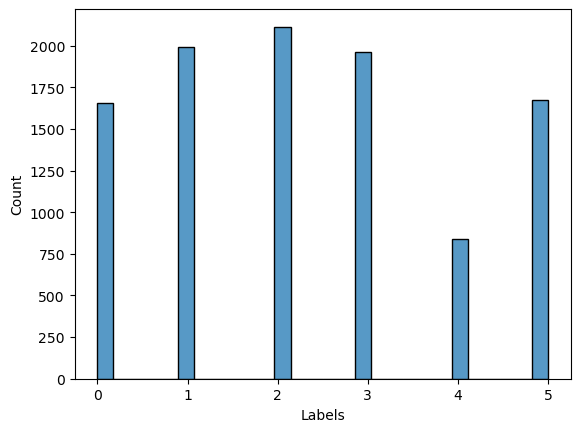

In [10]:
sns.histplot(data=training_data, x="Labels")
plt.show()

In [11]:
# in the data, 4 stands for "not known". probing those texts.
print(training_data[training_data["Labels"]==4]["Text"])

38       In the case of a catastrophic event, the Atlanta-area offices of the Centers for Disease Control...
42       Rep. David Cicilline is responsible for the federal loan guarantee to Solyndra, the failed solar...
43       Says Ohio budget item later signed into law by Gov. John Kasich requires women seeking an aborti...
46              Obamacare will provide insurance to all non-U.S. residents, even if they are here illegally.
48       It was under Barack Obama and Hillary Clinton that changed the rules of engagement that probably...
                                                        ...                                                 
10203                       Says Bernie Sanders wins California landslide, But ⅔ of his votes arent counted.
10206                                   Gov. Scott Walker (is) more than halfway to (his) 250,000 jobs goal.
10227       Recently though, the media has reported on thousands of illegal voters here in the commonwealth.
10233    Mayor Fung

In [12]:
# these sentences are not necessarily true or false, so can't do much for these.
# hence leaving the texts labeled 4 as is.

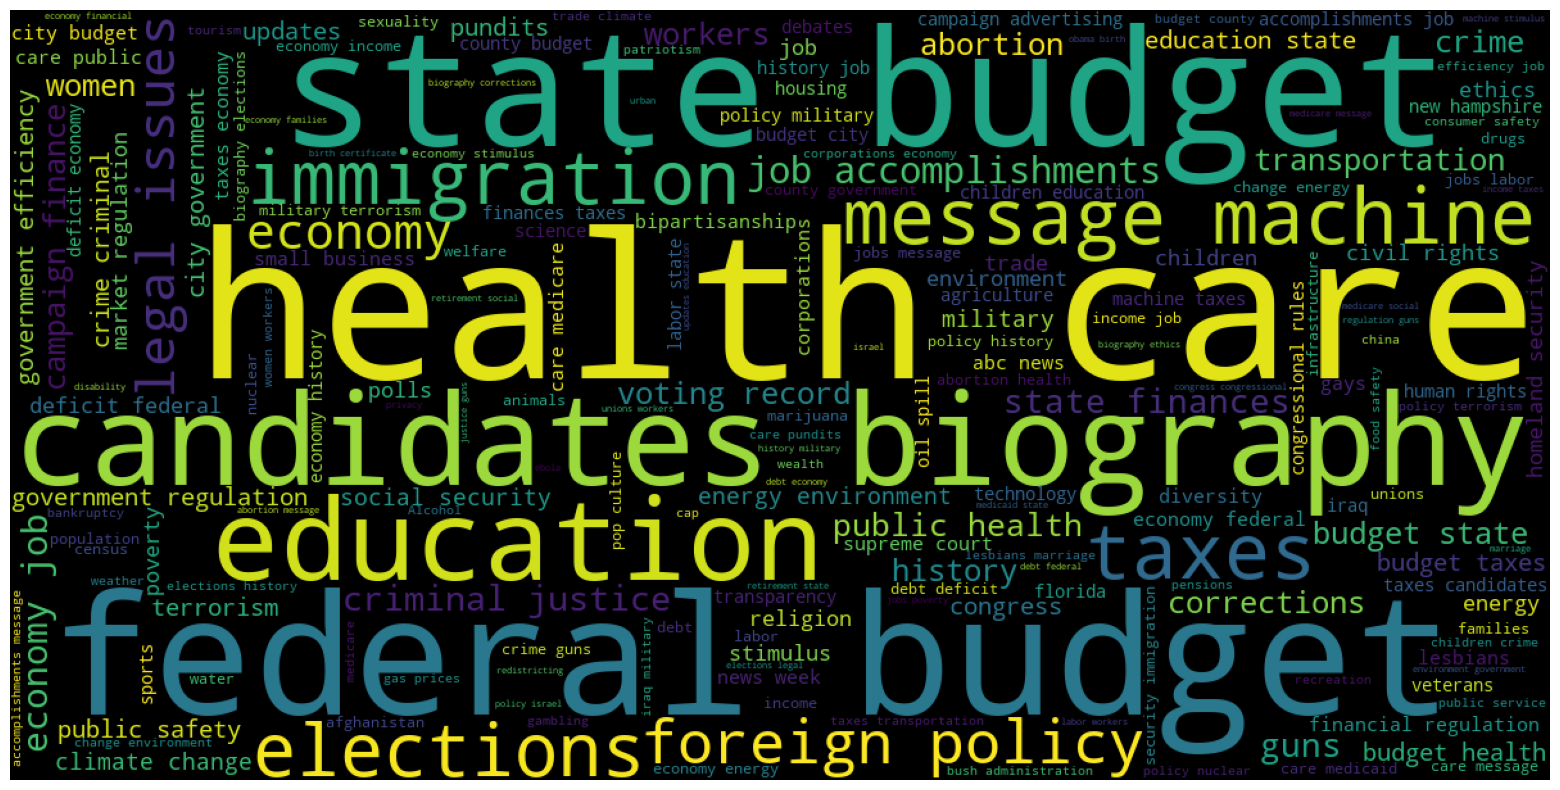

In [13]:
list_of_tags = [tag for tag_list in training_data["Text_Tag"] for tag in tag_list]
tags = " ".join(list_of_tags)
word_cloud = WordCloud(width=1200,height=600).generate(tags)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [14]:
def porter_stemming(word):
    
    # a simple rules-based stemming algorithm.

    if word.endswith('sses'):
        word = word[:-2]
    elif word.endswith('ies'):
        word = word[:-2]
    elif word.endswith('ss'):
        word = word
    elif word.endswith('s'):
        word = word[:-1]

    if re.search(r'[aeiou].*[^aeiou]ed$', word):
        word = re.sub(r'ed$', '', word)
    elif re.search(r'[aeiou].*[^aeiou]ing$', word):
        word = re.sub(r'ing$', '', word)

    if re.search(r'[aeiou].*[^aeiou]y$', word):
        word = re.sub(r'(y|Y)$', 'i', word)

    if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ational|ation|ator)$', word):
        word = re.sub(r'(ational|ation|ator)$', 'ate', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](tional|tion|tor)$', word):
        word = re.sub(r'(tional|tion|tor)$', 'tion', word)

    if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](enci|ence)$', word):
        word = re.sub(r'(enci|ence)$', 'ence', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](anci|ance)$', word):
        word = re.sub(r'(anci|ance)$', 'ance', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](izer|ization)$', word):
        word = re.sub(r'(izer|ization)$', 'ize', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](abli|able)$', word):
        word = re.sub(r'(abli|able)$', 'able', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](alli|al|ally)$', word):
        word = re.sub(r'(alli|al|ally)$', 'al', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ently|ent)$', word):
        word = re.sub(r'(ently|ent)$', 'ent', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ment)$', word):
        word = re.sub(r'(ment)$', 'ment', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ement)$', word):
        word = re.sub(r'(ement)$', 'ement', word)
    
    if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ion)$', word):
        result = re.sub(r'(ion)$', '', word)
        if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou]s$', result) or re.search(r'[^aeiou]*[aeiou]+.*[^aeiou]t$', result):
            word = result
    
    if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ate)$', word):
        word = re.sub(r'(ate)$', '', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](alize)$', word):
        word = re.sub(r'(alize)$', 'al', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ify)$', word):
        word = re.sub(r'(ify)$', '', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ic)$', word):
        word = re.sub(r'(ic)$', '', word)
    
    if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ance)$', word):
        word = re.sub(r'(ance)$', '', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ence)$', word):
        word = re.sub(r'(ence)$', '', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](able)$', word):
        word = re.sub(r'(able)$', '', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ment)$', word):
        word = re.sub(r'(ment)$', '', word)
    elif re.search(r'[^aeiou]*[aeiou]+.*[^aeiou](ion)$', word):
        result = re.sub(r'(ion)$', '', word)
        if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou]t$', result):
            word = result
    
    if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou]e$', word):
        result = re.sub(r'e$', '', word)
        if re.search(r'[^aeiou]*[aeiou]+.*[^aeiou]ll$', result):
            word = result
    
    return word

In [15]:
# making a simple word tokeniser. also stems the words.

def simple_tokeniser_and_stemmer(text):
    text = re.sub(r'[^\w\s]', '', text) # removing spl chars
    tokens = re.findall(r'\b\w+\b', text) # finding all "words"
    tokens = [word.lower() for word in tokens] #lowercase
    tokens = [porter_stemming(word) for word in tokens]
    return tokens

#apply stemming for text and tags.
training_data["Text_tokens"] = training_data["Text"].apply(simple_tokeniser_and_stemmer)
training_data['Text_Tag_tokens'] = training_data['Text_Tag'].apply(lambda x: [porter_stemming(word) for word in x])

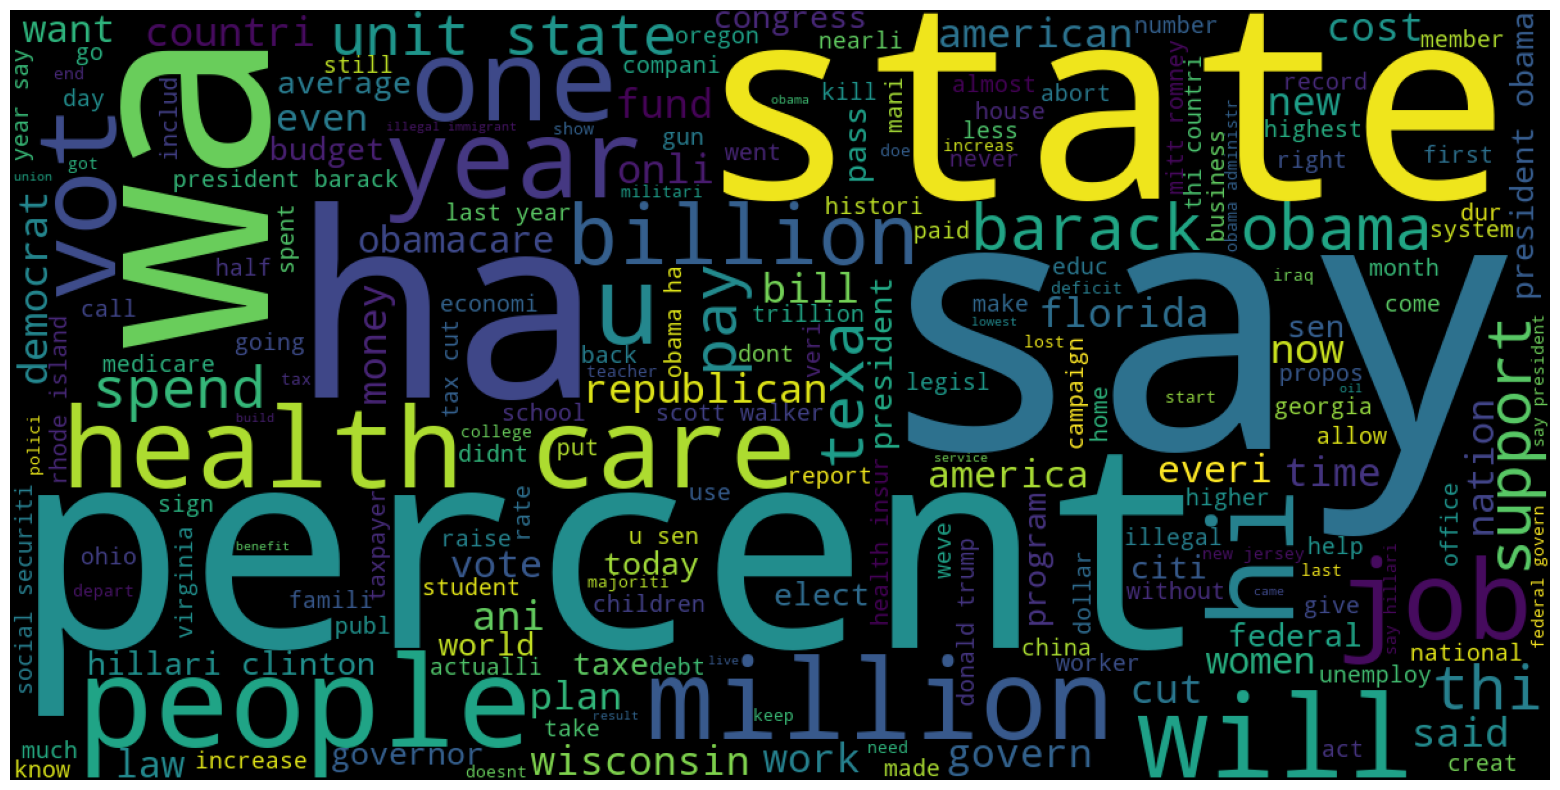

In [16]:
list_of_words = [word for word_list in training_data["Text_tokens"] for word in word_list]
words = " ".join(list_of_words)
word_cloud_words = WordCloud(width=1200,height=600).generate(words)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud_words)
plt.axis("off")
plt.show()

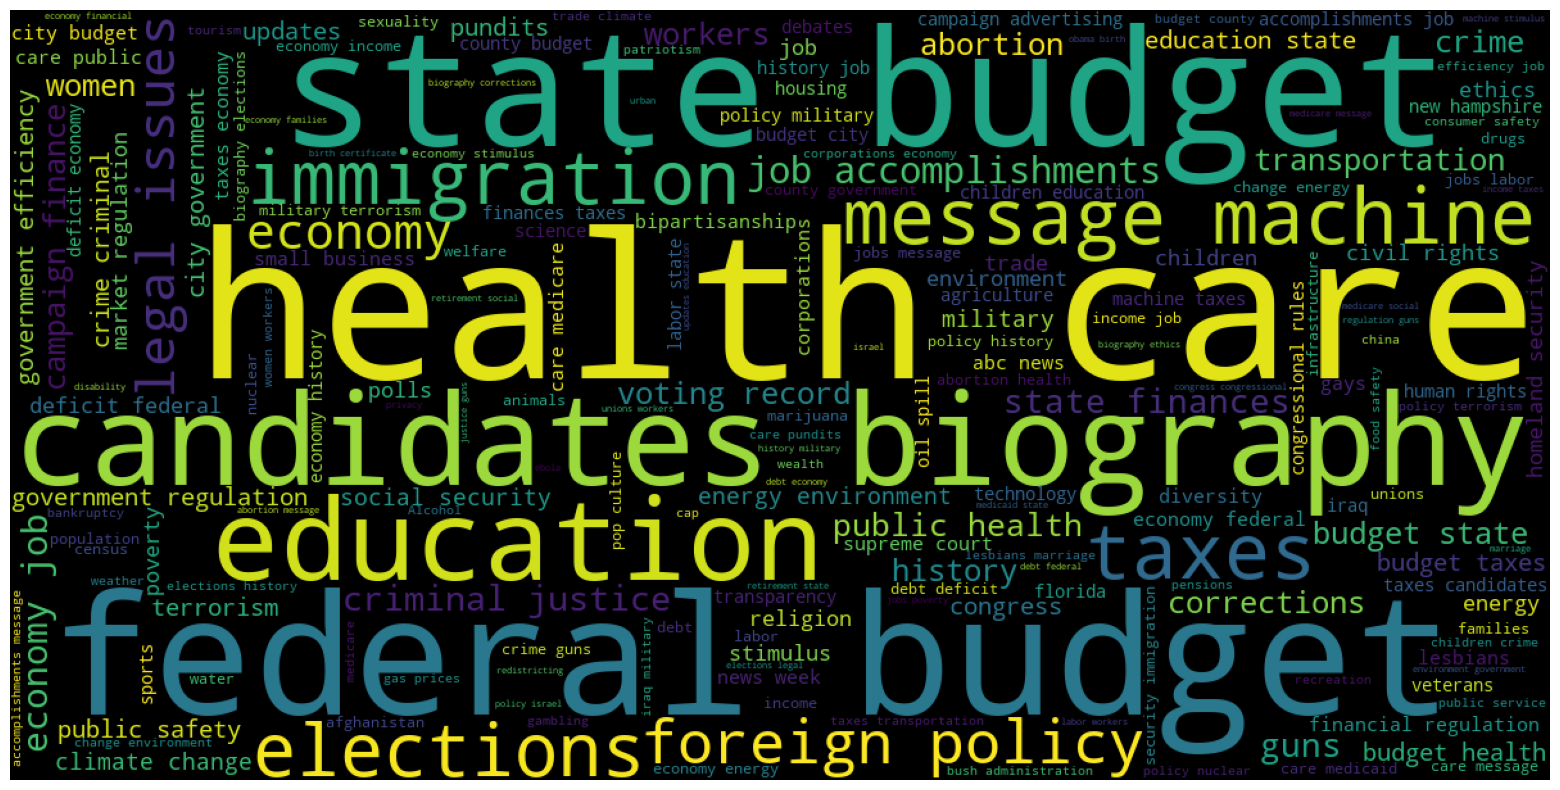

In [17]:
list_of_tags = [tag for tag_list in training_data["Text_Tag_tokens"] for tag in tag_list]
tags = " ".join(list_of_tags)
word_cloud_tags = WordCloud(width=1200,height=600).generate(tags)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()